In [8]:
!pip install spotipy


  Obtaining dependency information for spotipy from https://files.pythonhosted.org/packages/ea/35/304e456a471128aa4a776243558f43aee3444731ef8fc9bc8c351fddfdd8/spotipy-2.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for redis>=3.5.3 from https://files.pythonhosted.org/packages/c5/d1/19a9c76811757684a0f74adc25765c8a901d67f9f6472ac9d57c844a23c8/redis-5.0.8-py3-none-any.whl.metadata
Using cached spotipy-2.24.0-py3-none-any.whl (30 kB)
Using cached redis-5.0.8-py3-none-any.whl (255 kB)


In [10]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------- 20.5/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 465.5 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 465.5 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 454.0 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 454.0 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 458.0 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 476.3 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 528.4 kB/s eta 0:00:01
   --

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.cluster import KMeans
import random
import base64
import requests
import json
import importlib.machinery
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

In [7]:
!pip install requests

In [9]:
with open('spotify_key.py', 'w') as file:
    file.write("""
client_id = '*********'
client_secret = '**********'
username = '*********'
    """)


In [10]:
import importlib.machinery

loader = importlib.machinery.SourceFileLoader('api_keys', 'spotify_key.py')
api_keys = loader.load_module()

# Access the API key using the variable name api_key
client_id = api_keys.client_id
client_secret = api_keys.client_secret
username = api_keys.username


In [11]:
import os
os.environ["OMP_NUM_THREADS"]='7'

In [12]:
music_df = pd.read_csv(r'C:\Users\Anku Saini\Desktop\ProjectV\df_audio_features_5000_cleaned_whitespaces.csv', index_col=['name'])

In [13]:
music_copy = music_df.drop('id', axis=1).copy()

In [14]:
music_copy.drop(['html', 'type', 'time_signature', 'duration_ms'], axis=1, inplace=True)

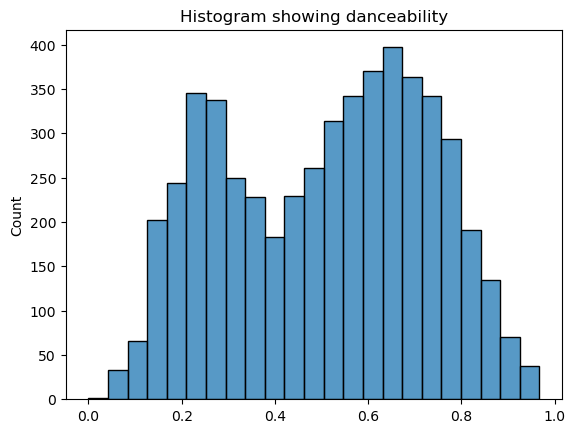

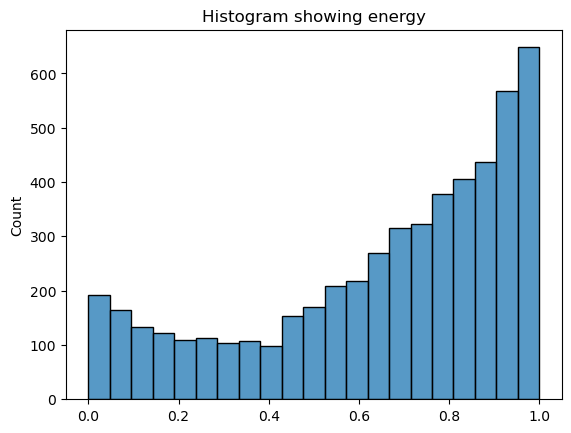

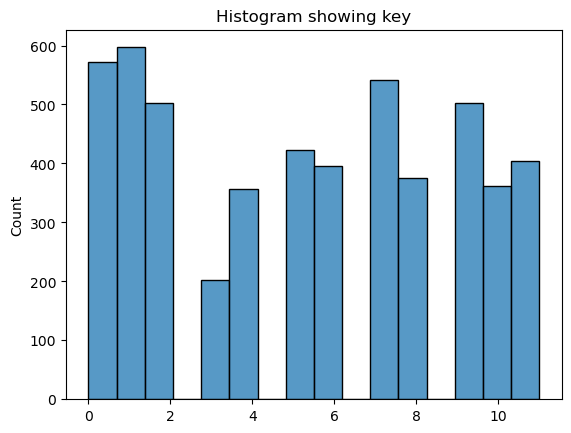

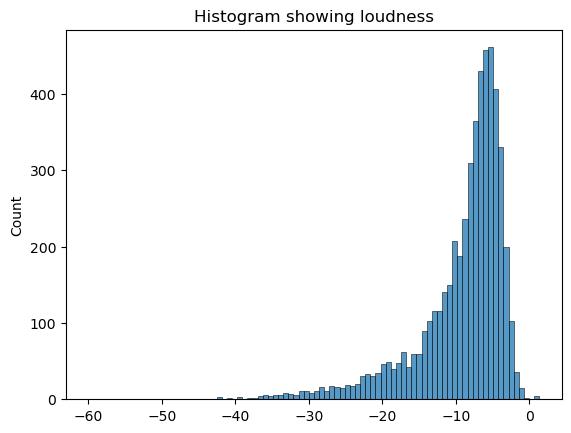

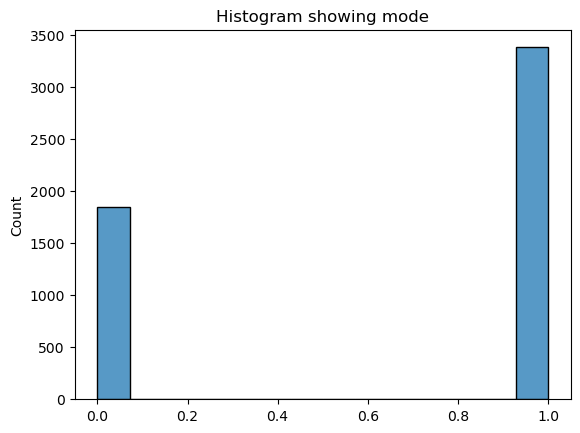

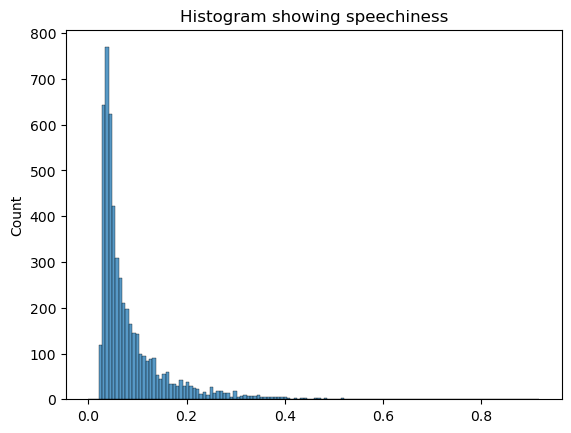

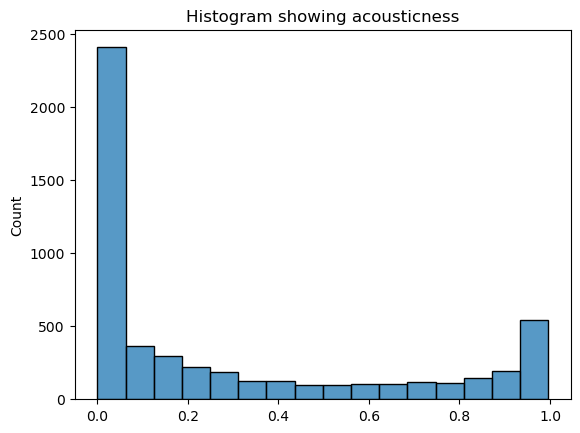

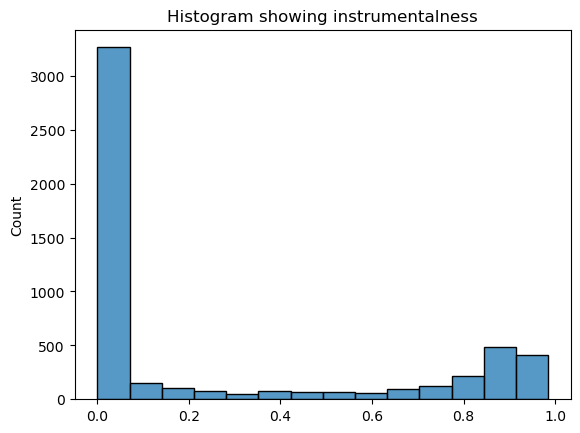

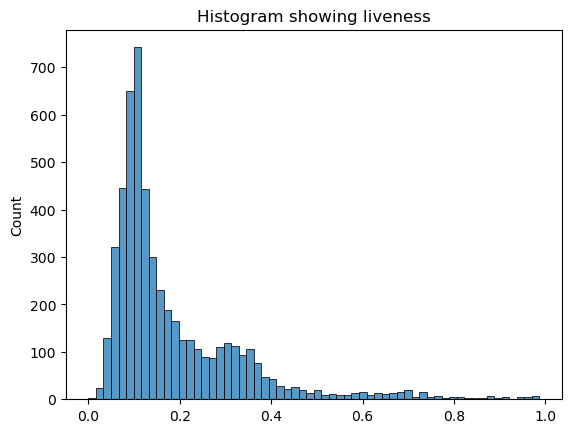

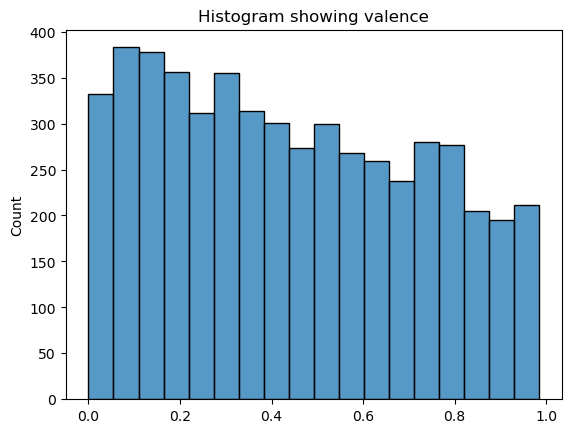

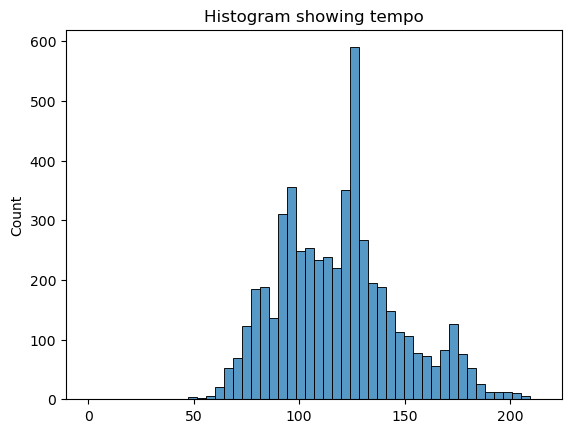

In [15]:
for _, column in music_copy.iloc[:, 1:].items():
    sns.histplot(column)
    plt.title(f'Histogram showing {column.name}')
    plt.xlabel('')
    plt.show()

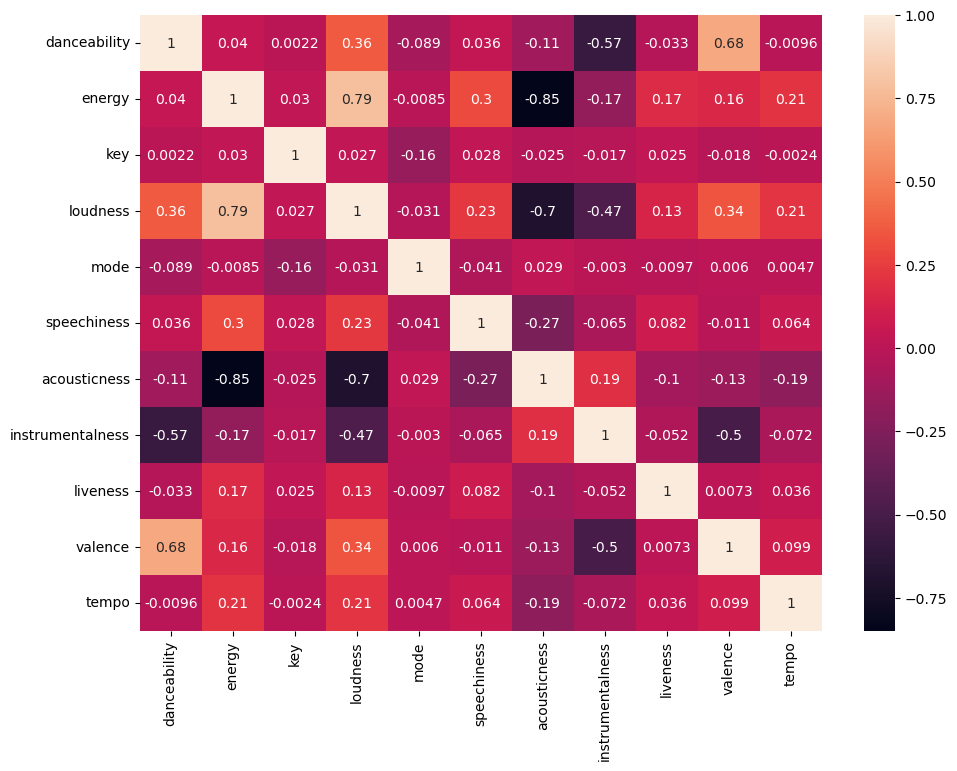

In [16]:
plt.figure(figsize=(11,8))
sns.heatmap(music_copy.iloc[:,1:].corr(), annot=True);

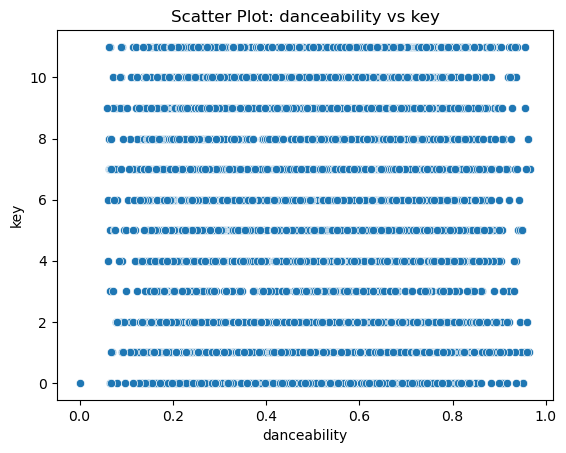

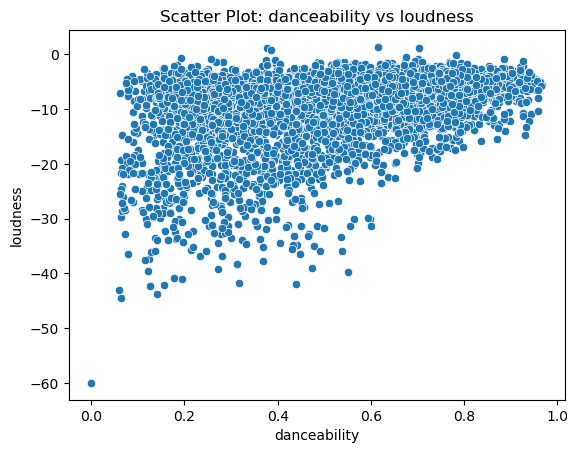

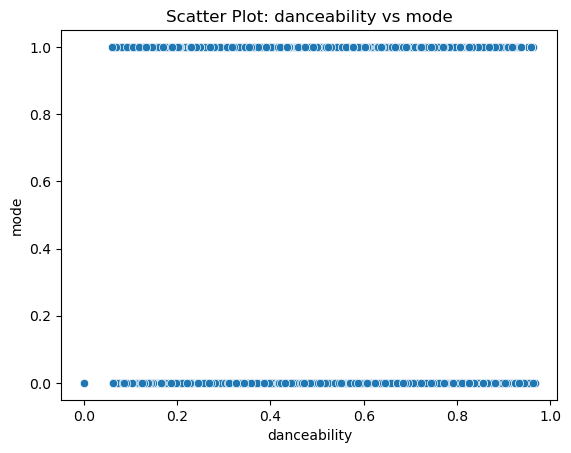

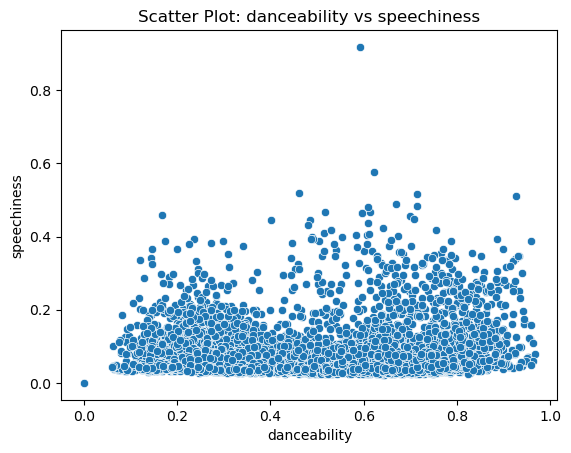

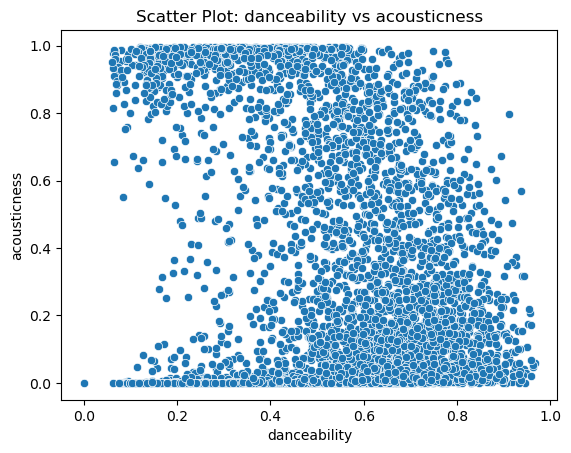

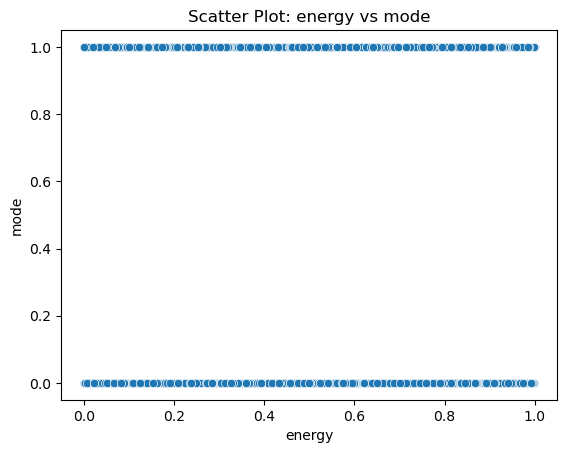

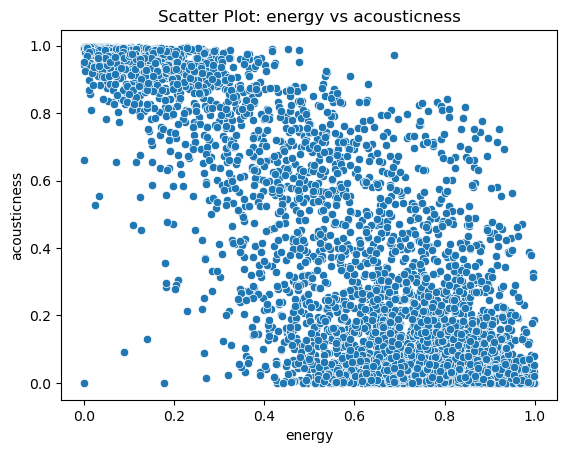

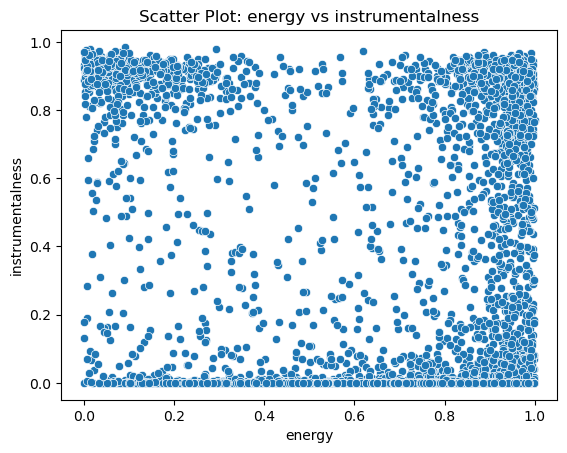

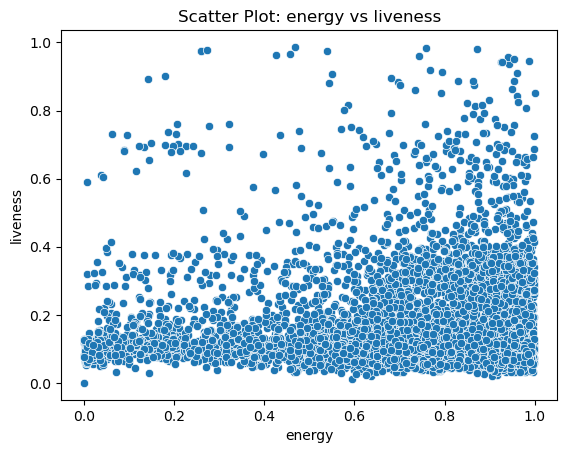

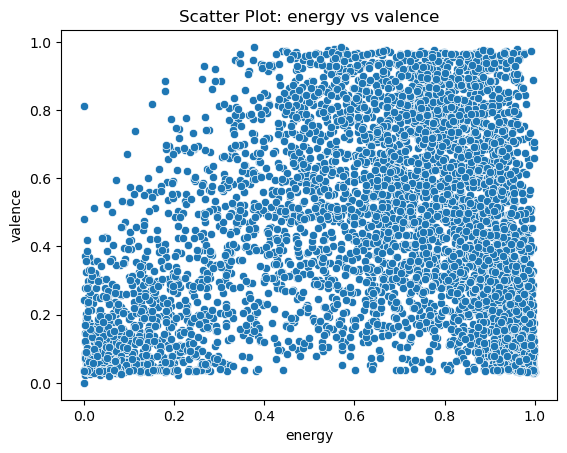

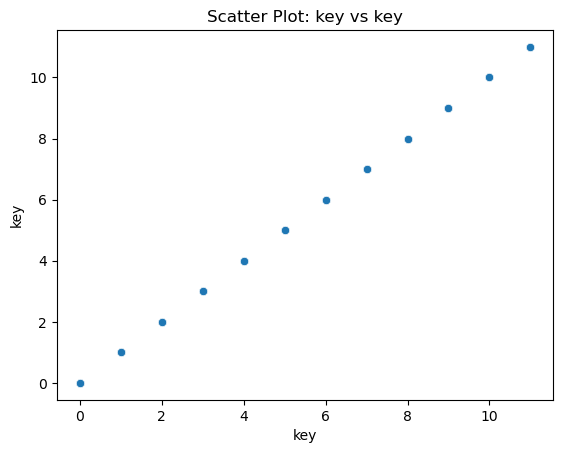

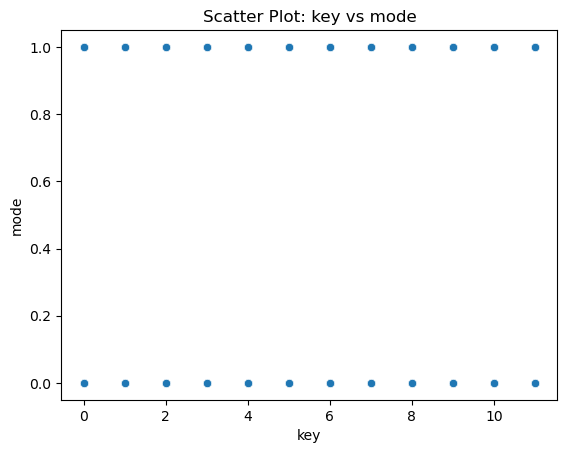

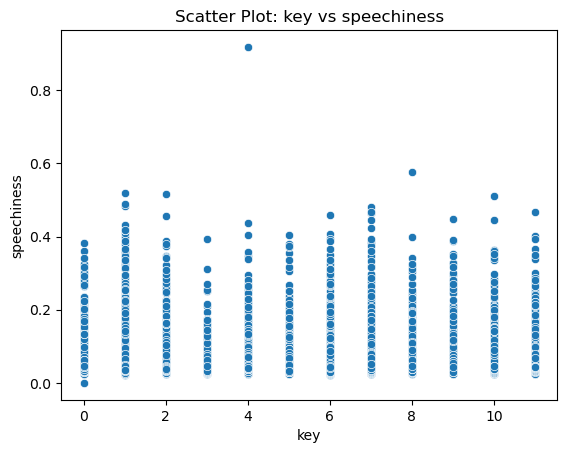

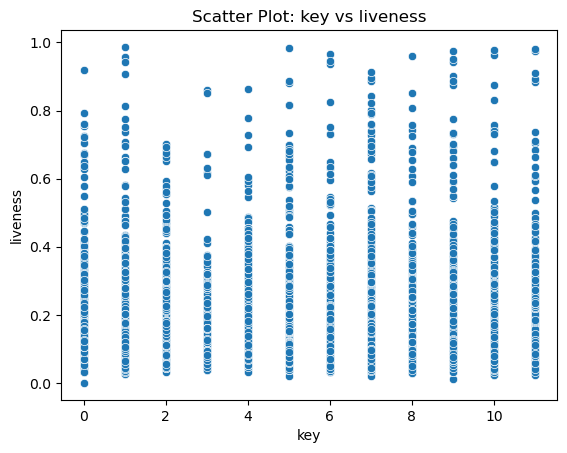

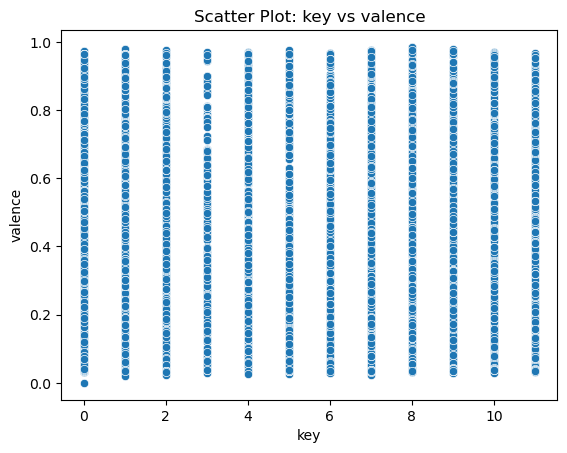

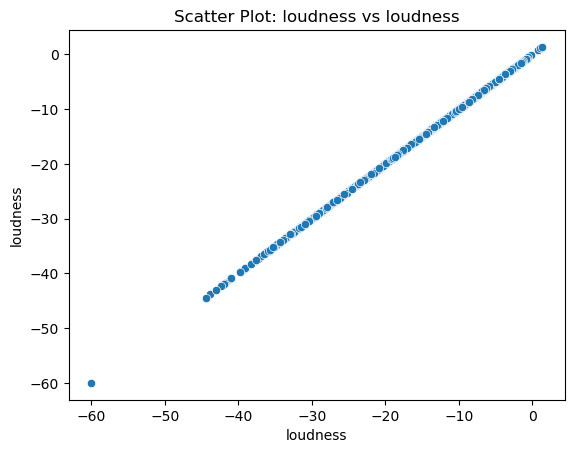

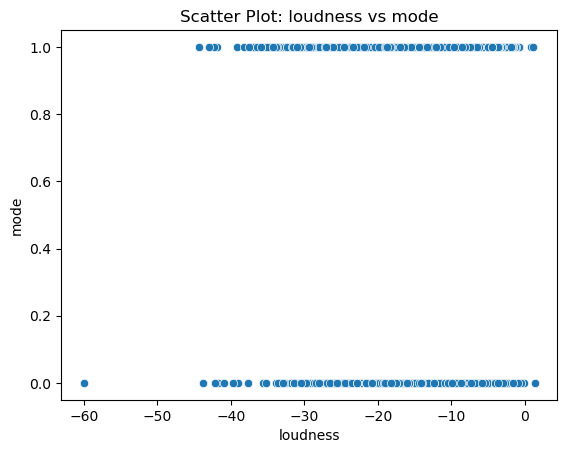

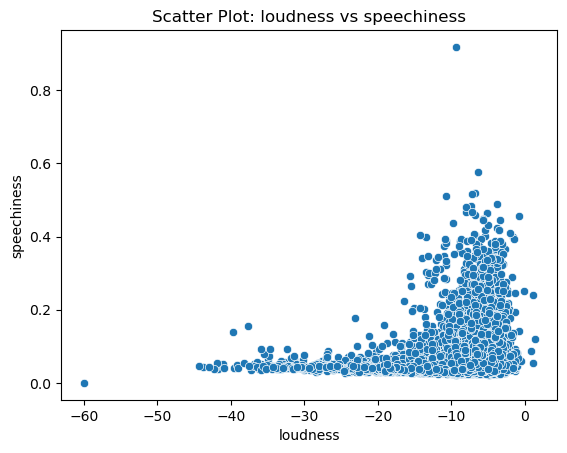

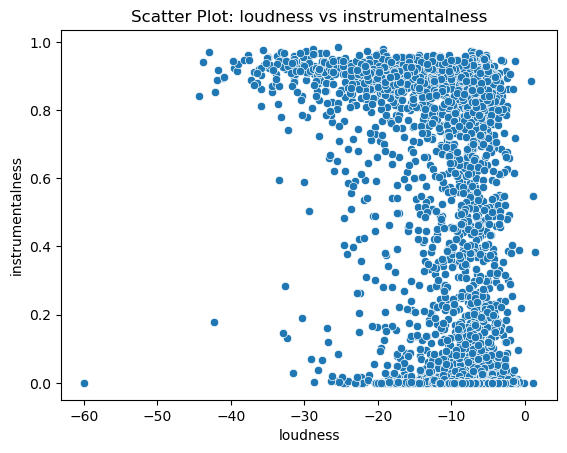

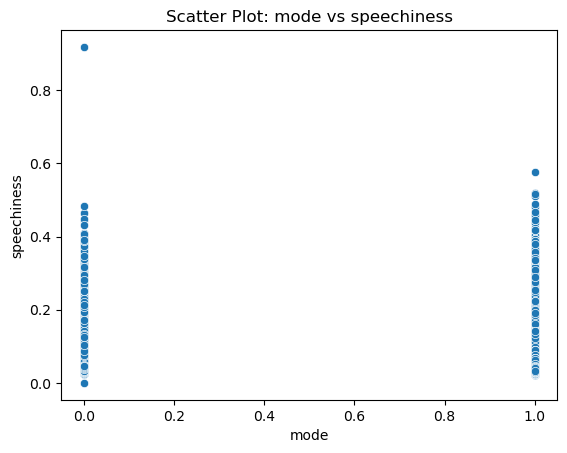

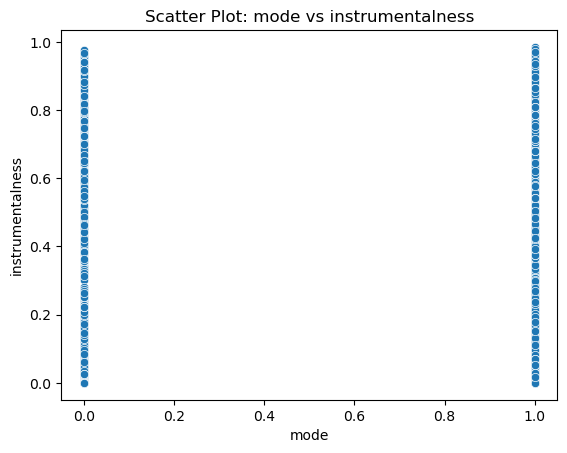

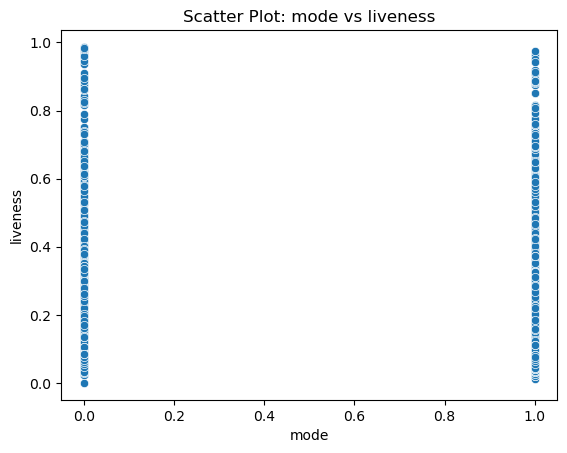

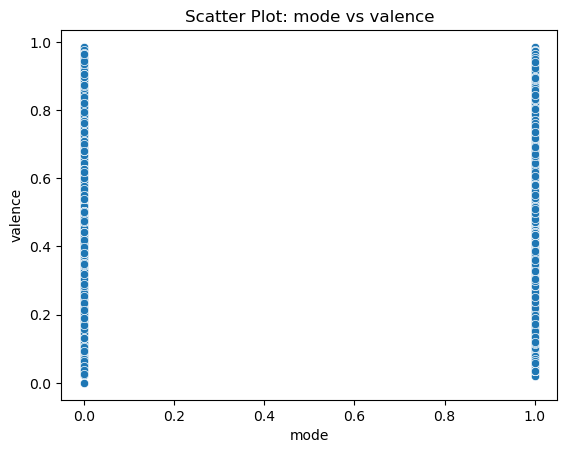

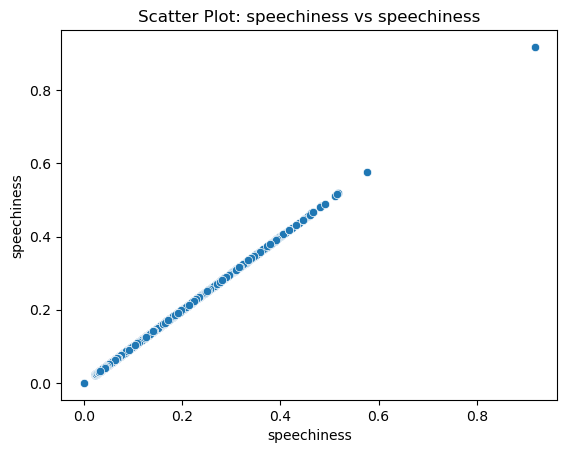

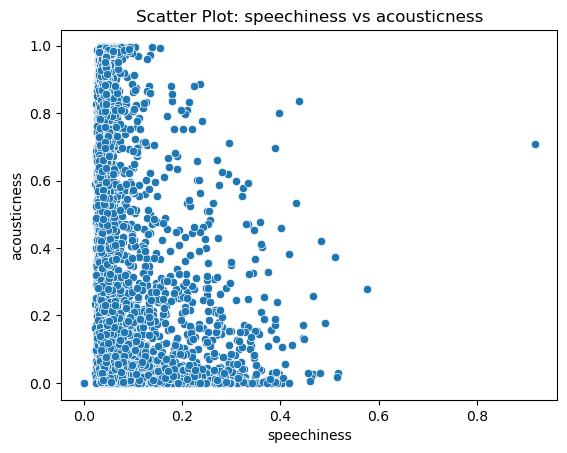

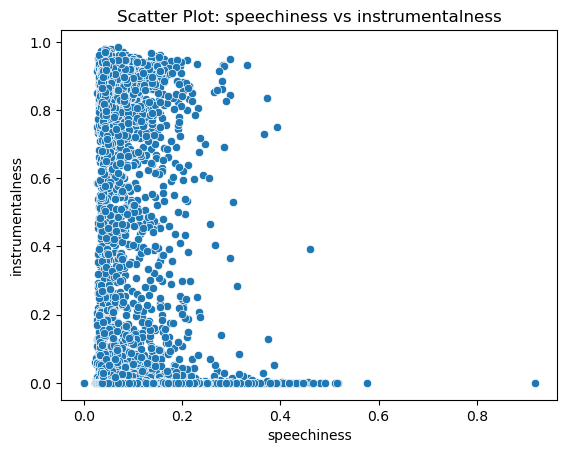

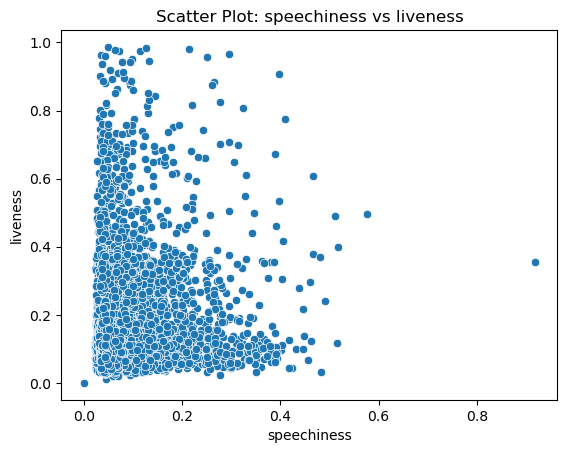

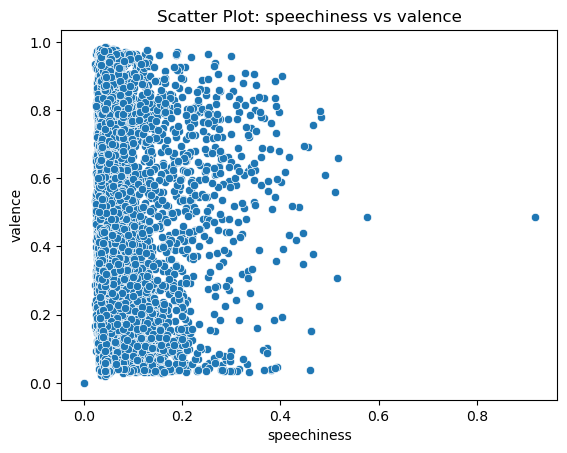

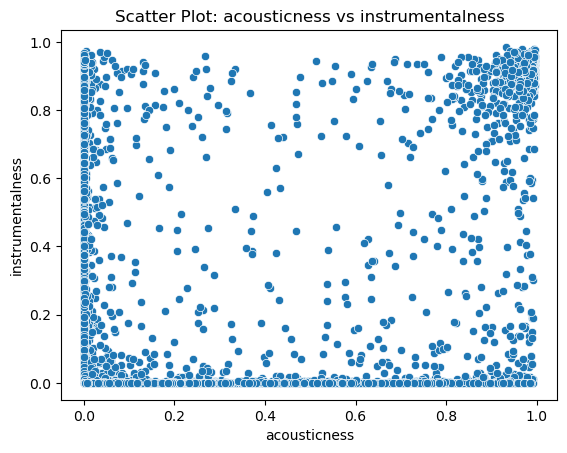

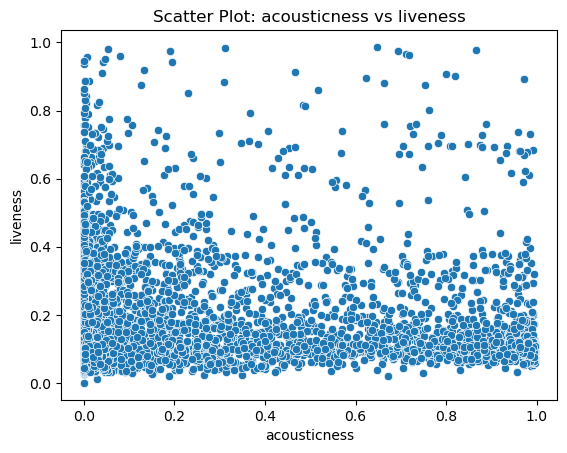

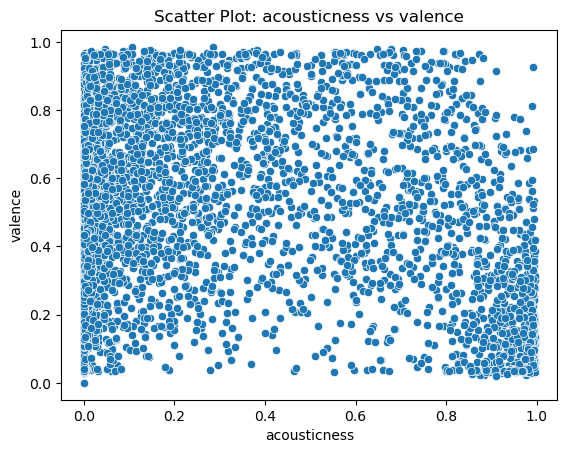

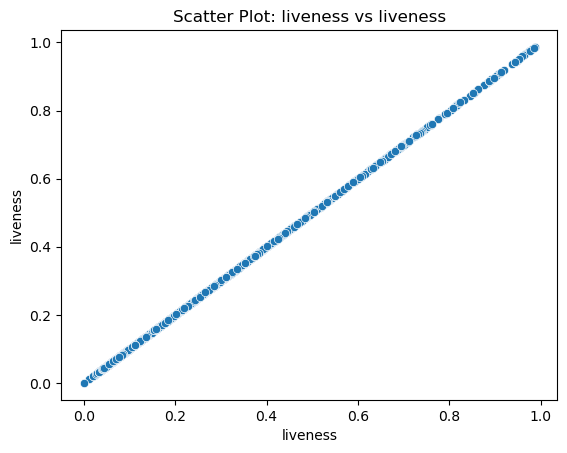

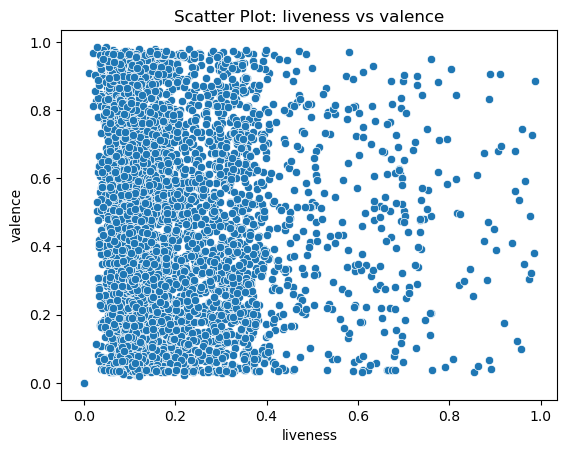

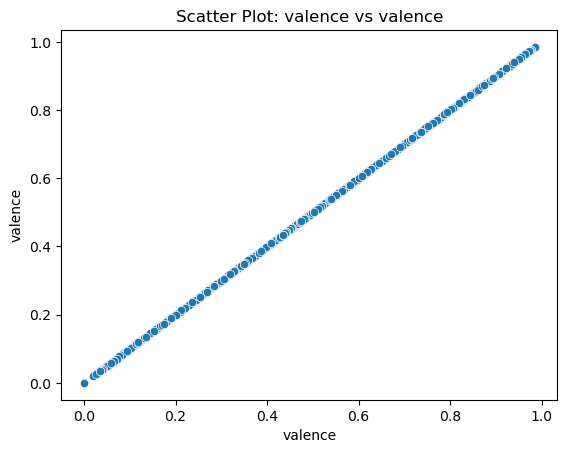

In [17]:
for i in range(music_copy.iloc[:, 1:].shape[1]):
    for j in range(i + 1, music_copy.iloc[:, 1:].shape[1]):  # Avoid plotting same columns
        sns.scatterplot(data=music_copy, x=music_copy.columns[i + 1], y=music_copy.columns[j])
        plt.title(f'Scatter Plot: {music_copy.columns[i + 1]} vs {music_copy.columns[j]}')
        plt.show()

In [18]:
music_copy.iloc[:,1:].var()

danceability          0.047542
energy                0.083137
key                  12.756034
loudness             39.625138
mode                  0.228661
speechiness           0.005068
acousticness          0.126725
instrumentalness      0.137408
liveness              0.022323
valence               0.077131
tempo               816.157103
dtype: float64

In [19]:
#music_copy.drop(['liveness', 'valence'], axis = 1, inplace= True)
unscaled_columns = ['key', 'loudness', 'tempo']
music_copy[unscaled_columns] =MinMaxScaler().fit_transform(music_copy[unscaled_columns])

C:\Users\Anku Saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anku Saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anku Saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anku Saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

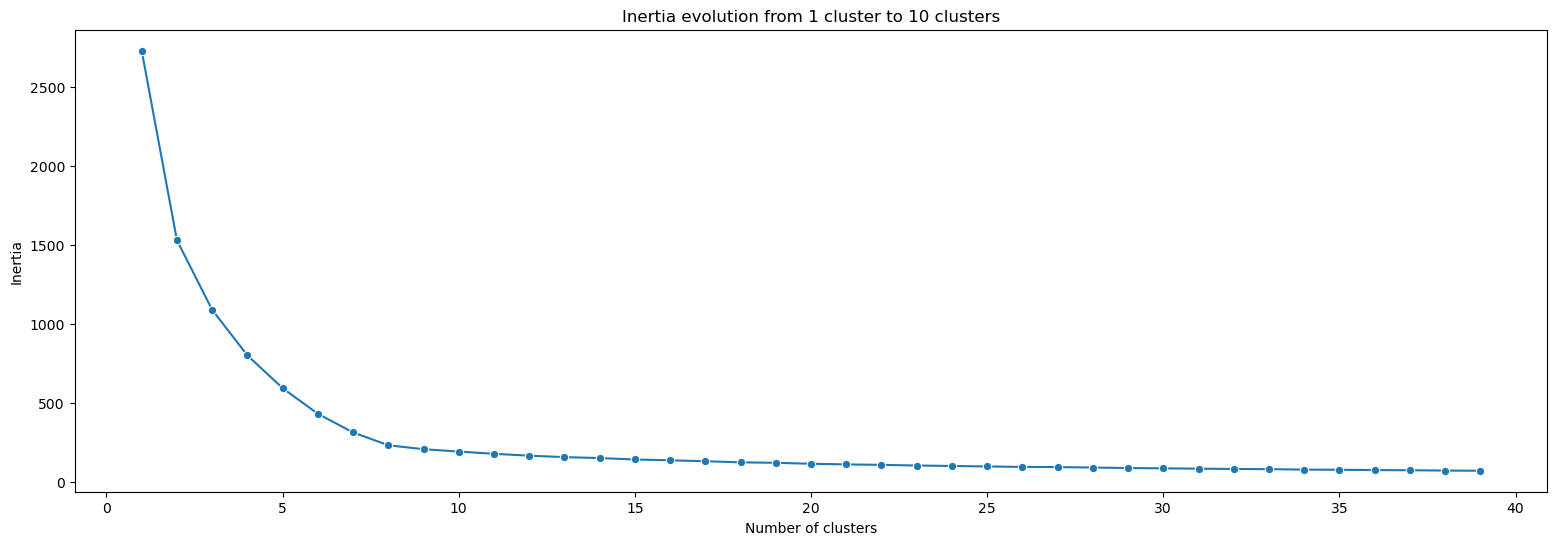

In [20]:
inertia_list = []


for i in range(1,40):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(music_copy[['tempo',  'loudness',  'instrumentalness', 'acousticness', 'mode']])
    inertia_list.append(round(myKMeans.inertia_))



fig, ax = plt.subplots(figsize=(19, 6))
plt.title(f'Inertia evolution from 1 cluster to 10 clusters')
sns.lineplot(x=range(1, 40), y=inertia_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Anku Saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anku Saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anku Saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anku Saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

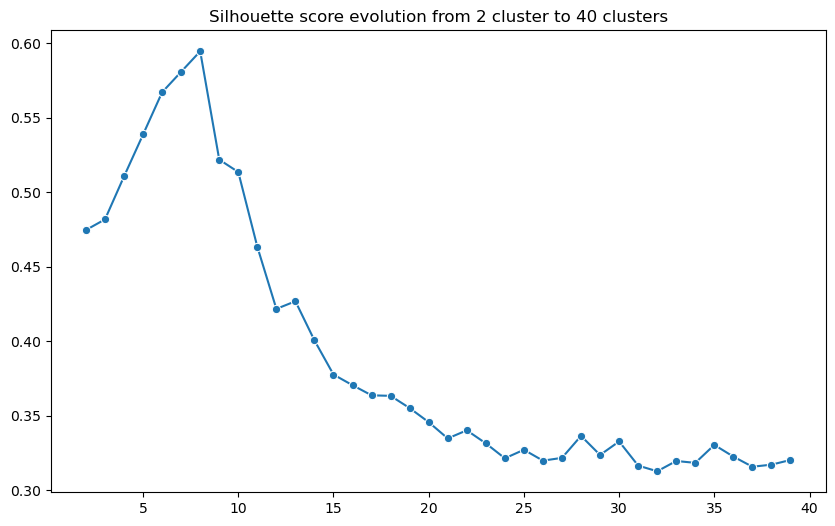

In [21]:
silh_scores = []

for i in range(2, 40):
    kmeanss = KMeans(n_clusters=i).fit(music_copy[['tempo',  'loudness',  'instrumentalness', 'acousticness', 'mode']])
    xx = silhouette_score(music_copy[['tempo', 'loudness',  'instrumentalness', 'acousticness', 'mode']], kmeanss.labels_)
    silh_scores.append(xx)

plt.figure(figsize=(10, 6))  
plt.title(f'Silhouette score evolution from 2 cluster to 40 clusters')
sns.lineplot(x=range(2, 40), y=silh_scores, marker='o')
plt.show()

In [22]:
music_kmeans = KMeans(n_clusters=8, random_state=120)
music_kmeans.fit(music_copy[['tempo', 'loudness',  'instrumentalness', 'acousticness', 'mode']])

C:\Users\Anku Saini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=120)

In [23]:
music_cluster = list(music_kmeans.labels_)
music_copy['music_cluster'] = [x for x in music_cluster]

In [24]:
playlistss = music_copy.groupby('music_cluster').agg({'danceability':'mean', 'energy':'mean', 
                                         'loudness':'mean', 'tempo':'mean',
                                        'acousticness':'mean', 'instrumentalness':'mean'}).reset_index()

In [25]:
playlistss

music_cluster  danceability    energy  loudness     tempo  acousticness  \
0              0      0.325369  0.137513  0.623016  0.499125      0.940129   
1              1      0.583325  0.764809  0.870744  0.566019      0.094981   
2              2      0.625612  0.767173  0.881156  0.566695      0.091677   
3              3      0.300489  0.886187  0.843151  0.570785      0.019422   
4              4      0.536708  0.435322  0.795433  0.544731      0.712529   
5              5      0.334778  0.147481  0.623886  0.477556      0.918858   
6              6      0.349596  0.875503  0.846265  0.577634      0.022378   
7              7      0.583247  0.427530  0.796172  0.543787      0.706943   

   instrumentalness  
0          0.857336  
1          0.031224  
2          0.022467  
3          0.784778  
4          0.030750  
5          0.870315  
6          0.780199  
7          0.028322

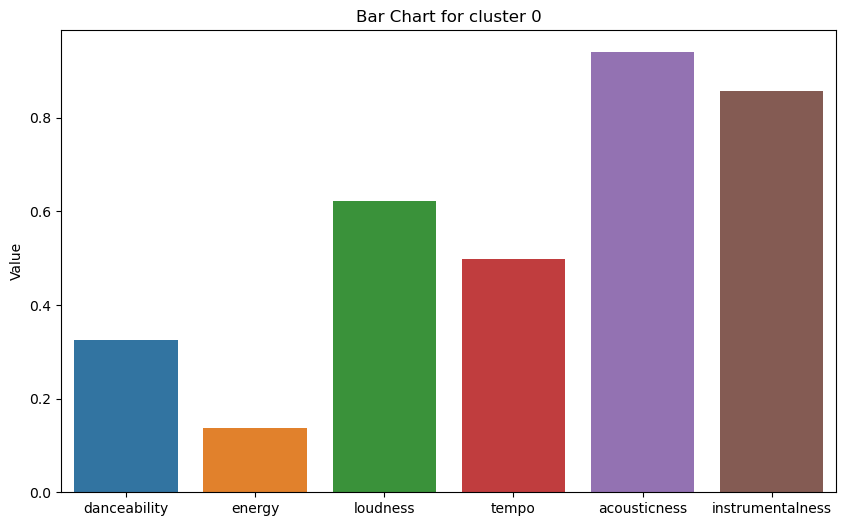

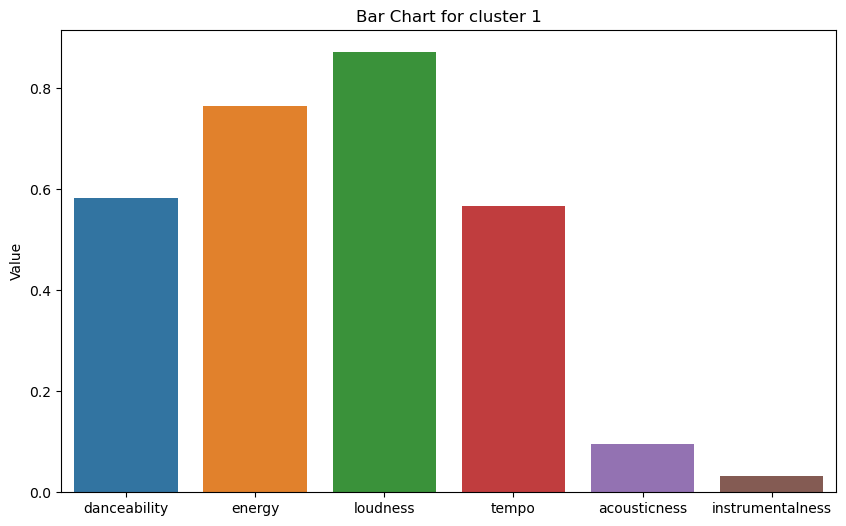

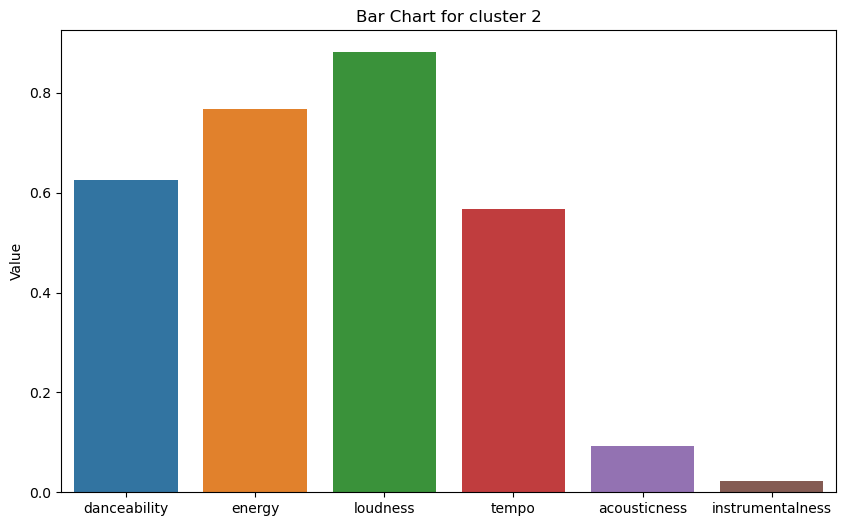

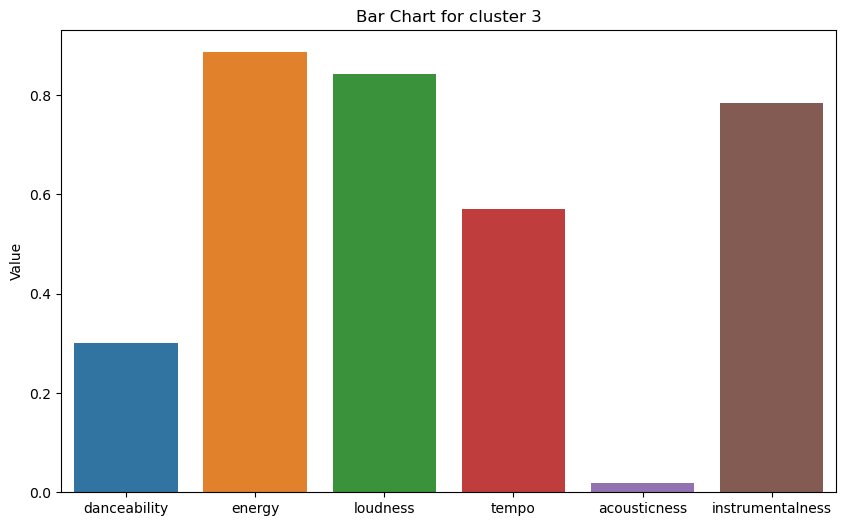

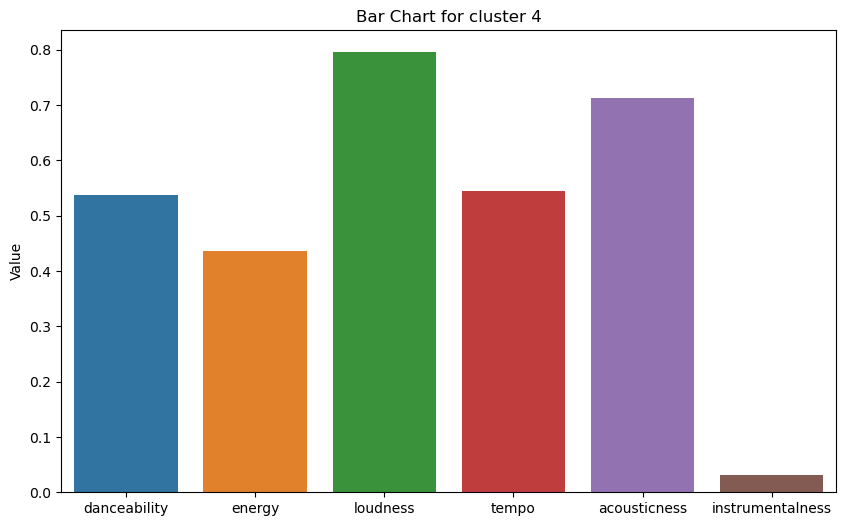

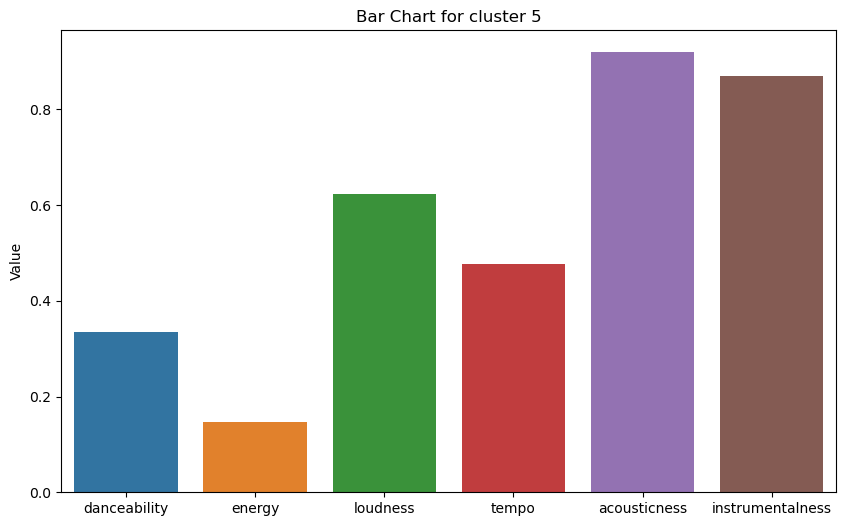

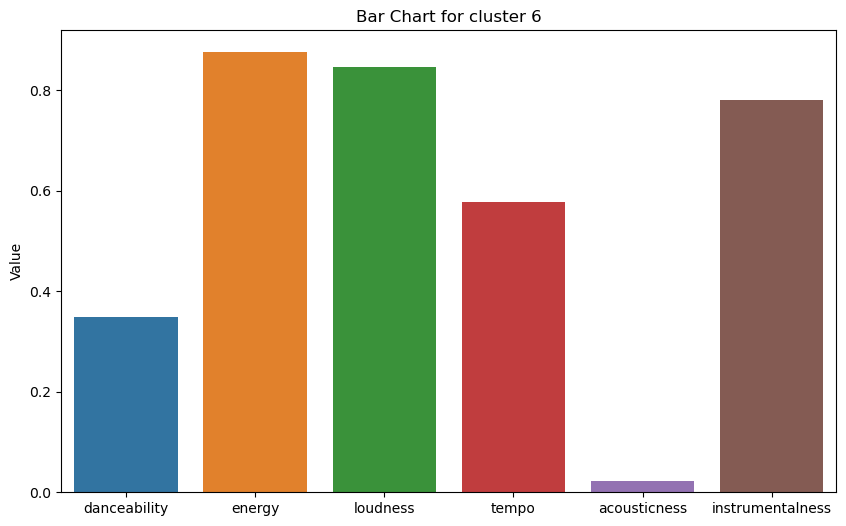

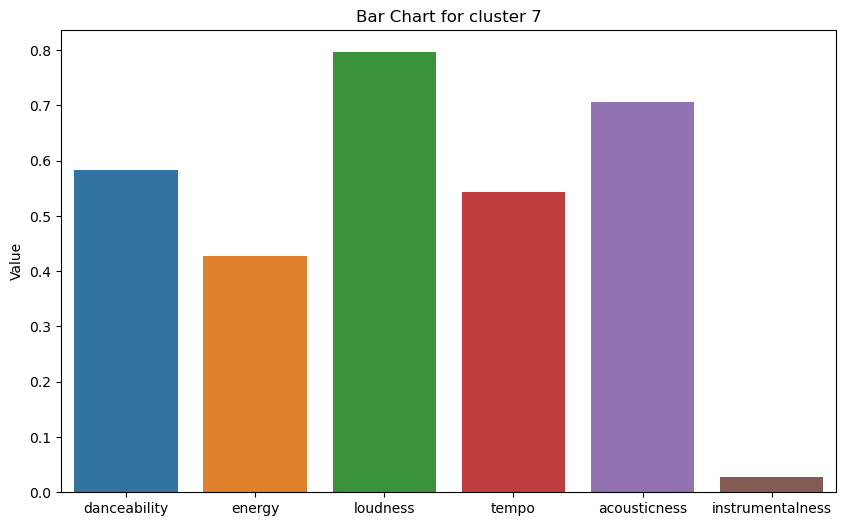

In [26]:
playlistss1 = playlistss.drop('music_cluster', axis=1)

# Plot bar charts for each cluster using seaborn
for index, row in playlistss1.iterrows():
    plt.figure(figsize=(10, 6))  
    sns.barplot(x=row.index, y=row.values)
    plt.xlabel('')
    plt.ylabel('Value')
    plt.title(f'Bar Chart for cluster {index}')
    plt.savefig(f'bar_chart_cluster_{index}.png')
    plt.show()

In [27]:
def get_token():

    auth_string = client_id + ':' + client_secret
    auth_bytes = auth_string.encode('utf-8')
    auth_base64 = str(base64.b64encode(auth_bytes), 'utf-8')

    url =  "https://accounts.spotify.com/api/token"
    headers = {
        'Authorization': 'Basic ' + auth_base64,  # Added space after 'Basic' to prevent error
        'Content-Type': "application/x-www-form-urlencoded"
    }

    data = {"grant_type": "client_credentials"}
    result = requests.post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

# Call the function to get the access token
access_token = get_token()
print(access_token)

BQAWyfjVM9ksO78t9DPXX0aKan9jQYAa6SiQKPc_B3CIJujzzKZeBlqOFgz-7K-45kstHB6otskInBF2GRNNvod8ANBB9ZnBnYE0rfsUnWFhoHteH7s


In [28]:
def get_auth_header(token):
  return {'Authorization' : 'Bearer '+ token}

In [29]:
#to help search forn an artist, then get the artist top tracks

def search_for_artist(token, artist_name):
  url = "https://api.spotify.com/v1/search"
  headers = get_auth_header(token)
  query = f"?q={artist_name}&type=artist&limit=1"

  query_url = url + query
  result = requests.get(query_url, headers=headers)
  json_result = json.loads(result.content)['artists']['items']
  if len(json_result) == 0:
    print('No artist with this name exists.....')
    return None
  return json_result

In [30]:
def get_song_by_artist(token, artist_id):
  url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks?country=US"
  headers = get_auth_header(token)

  result = requests.get(url, headers=headers)
  json_result = json.loads(result.content)

  return json_result

In [31]:
def get_song_detail(token, song_id):
  url = f"https://api.spotify.com/v1/tracks/{song_id}"
  headers = get_auth_header(token)

  result = requests.get(url, headers=headers)
  json_result = json.loads(result.content)

  return json_result

In [33]:
import requests
import json
import time
from concurrent.futures import ThreadPoolExecutor, as_completed

# Cache to store artist info
artist_cache = {}

def search_for_artist(token, artist_name):
    if artist_name in artist_cache:
        return artist_cache[artist_name]
    
    url = "https://api.spotify.com/v1/search"
    query = f"?q={artist_name}&type=artist"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {token}"
    }
    query_url = url + query
    result = requests.get(query_url, headers=headers)
    
    if result.status_code == 429:  # Too Many Requests
        retry_after = int(result.headers.get("Retry-After", 0.01))
        print(f"Rate limit exceeded. Retrying after {retry_after} seconds.")
        time.sleep(retry_after)
        return search_for_artist(token, artist_name)
    
    try:
        json_result = json.loads(result.content)['artists']['items']
        if len(json_result) == 0:
            print(f'No artist with the name "{artist_name}" exists.')
            artist_cache[artist_name] = []
            return []
        artist_cache[artist_name] = json_result
        return json_result
    except KeyError:
        print('KeyError: The key "artists" does not exist in the response.')
        artist_cache[artist_name] = []
        return []

def process_artist(row):
    artists = str(row['artist']).strip()
    artist_info = search_for_artist(access_token, artists)
    if artist_info:
        genres = artist_info[0].get('genres', [])
        if genres:
            return genres
        else:
            print(f'No genres found for artist "{artists}".')
            return []
    else:
        print(f'Skipping artist "{artists}" due to missing data.')
        return []

# Example usage with parallel processing
music_genre = []
with ThreadPoolExecutor(max_workers=5) as executor:
    futures = [executor.submit(process_artist, row) for _, row in music_copy.iterrows()]
    for future in as_completed(futures):
        result = future.result()
        music_genre.append(result if result else ["Unknown"])  # Add placeholder for missing genres

# Ensure the length matches
if len(music_genre) != len(music_copy):
    print(f"Length mismatch: music_genre ({len(music_genre)}) vs music_copy ({len(music_copy)})")

music_copy['genre'] = music_genre
print(music_copy.head())

No genres found for artist "Rio Combo".
No genres found for artist "Bïa".
No genres found for artist "Jenny Chi".
No genres found for artist "Jenny Chi".
No genres found for artist "Tempo Rei".
No genres found for artist "Pete Krebs & The Kung Pao Chi".
No genres found for artist "Som Ibérico".
No genres found for artist "Quatro Ventos".
No genres found for artist "Elomar, Geraldo Azevedo, Vital Farias, Xangai".
No genres found for artist "Homem ao Mar".
No genres found for artist "Carlos Madrid".
No genres found for artist "College & Electric Youth".
No genres found for artist "Carlitos Vieira Dias".
No genres found for artist "Espaldamaceta".
No genres found for artist "Albert Pla & Pascal Comelade".
No genres found for artist "Refree".
No genres found for artist "DB Boulevard".
No genres found for artist "Clem Snide".
No genres found for artist "Isaac Ulam".
No genres found for artist "Hefner".
No genres found for artist "Lulu And The Luvvers".
No genres found for artist "Pure Bliss

In [34]:
# To check for the genre that is common in each playlist
cluster_0 = {}
cluster_1 = {}
cluster_2 = {}
cluster_3 = {}
cluster_4 = {}
cluster_5 = {}
cluster_6 = {}
cluster_7 = {}
cluster_8 = {}
cluster_9 = {}


for _, row in music_copy.iterrows():
    genre_list = row['genre']
    cluster_group = row['music_cluster'] 
    if cluster_group == 0:
        for genre in genre_list:
            if genre in cluster_0:
                cluster_0[genre] += 1
            else:
                cluster_0[genre] = 1
    elif cluster_group == 1:
        for genre in genre_list:
            if genre in cluster_1:
                cluster_1[genre] += 1
            else:
                cluster_1[genre] = 1    
    elif cluster_group == 2:
        for genre in genre_list:
            if genre in cluster_2:
                cluster_2[genre] += 1
            else:
                cluster_2[genre] = 1    
                
    elif cluster_group == 3:
        for genre in genre_list:
            if genre in cluster_3:
                cluster_3[genre] += 1
            else:
                cluster_3[genre] = 1    
    elif cluster_group == 4:
        for genre in genre_list:
            if genre in cluster_4:
                cluster_4[genre] += 1
            else:
                cluster_4[genre] = 1    
    elif cluster_group == 5:
        for genre in genre_list:
            if genre in cluster_5:
                cluster_5[genre] += 1
            else:
                cluster_5[genre] = 1  

    elif cluster_group == 6:
        for genre in genre_list:
            if genre in cluster_6:
                cluster_6[genre] += 1
            else:
                cluster_6[genre] = 1  

    elif cluster_group == 7:
        for genre in genre_list:
            if genre in cluster_7:
                cluster_7[genre] += 1
            else:
                cluster_7[genre] = 1  

In [35]:
cl_0 = pd.DataFrame(list(cluster_0.items()), columns = ['genre', 'total']).sort_values(by = 'total', ascending=False).head(35)
cl_1 = pd.DataFrame(list(cluster_1.items()), columns = ['genre', 'total']).sort_values(by = 'total', ascending=False).head(35)
cl_2 = pd.DataFrame(list(cluster_2.items()), columns = ['genre', 'total']).sort_values(by = 'total', ascending=False).head(35)
cl_3 = pd.DataFrame(list(cluster_3.items()), columns = ['genre', 'total']).sort_values(by = 'total', ascending=False).head(35)
cl_4 = pd.DataFrame(list(cluster_4.items()), columns = ['genre', 'total']).sort_values(by = 'total', ascending=False).head(35)
cl_5 = pd.DataFrame(list(cluster_5.items()), columns = ['genre', 'total']).sort_values(by = 'total', ascending=False).head(35)
cl_6 = pd.DataFrame(list(cluster_6.items()), columns = ['genre', 'total']).sort_values(by = 'total', ascending=False).head(35)
cl_7 = pd.DataFrame(list(cluster_7.items()), columns = ['genre', 'total']).sort_values(by = 'total', ascending=False).head(35)

[nltk_data] Downloading package stopwords to C:\Users\Anku
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


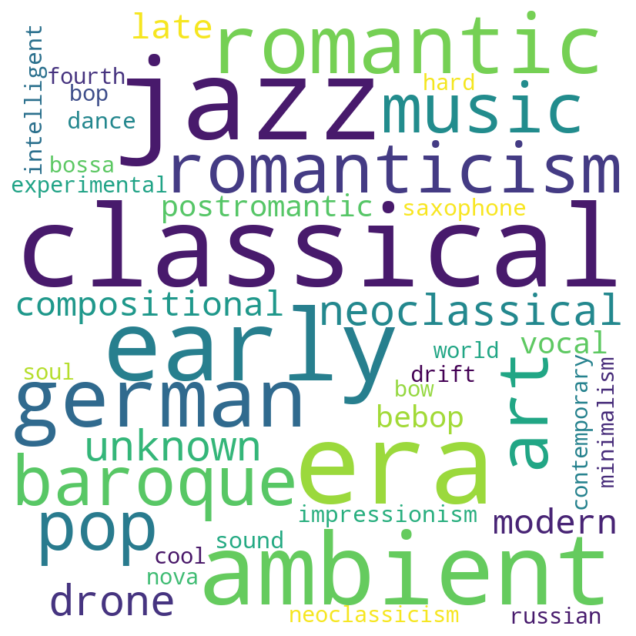

In [36]:
# common genre in cluster 0

cluster_text = ' '.join(cl_0['genre'])

# Text preprocessing
cluster_text = cluster_text.lower()  # Convert to lowercase
cluster_text = cluster_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation


nltk.download('stopwords')
# Remove stopwords
stop_words = set(stopwords.words('english'))
cluster_text = ' '.join([word for word in cluster_text.split() if word not in stop_words])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cluster_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Anku
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


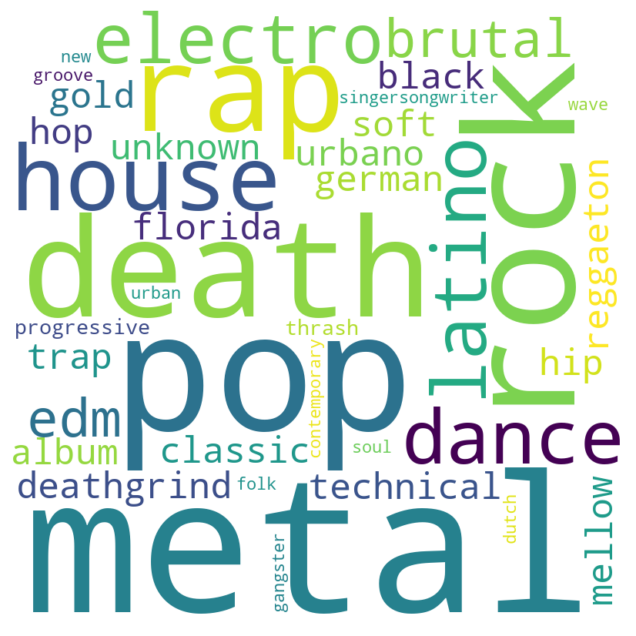

In [37]:
# common genre in cluster 1

cluster_text = ' '.join(cl_1['genre'])

# Text preprocessing
cluster_text = cluster_text.lower()  # Convert to lowercase
cluster_text = cluster_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

nltk.download('stopwords')
# Remove stopwords
stop_words = set(stopwords.words('english'))
cluster_text = ' '.join([word for word in cluster_text.split() if word not in stop_words])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cluster_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Anku
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


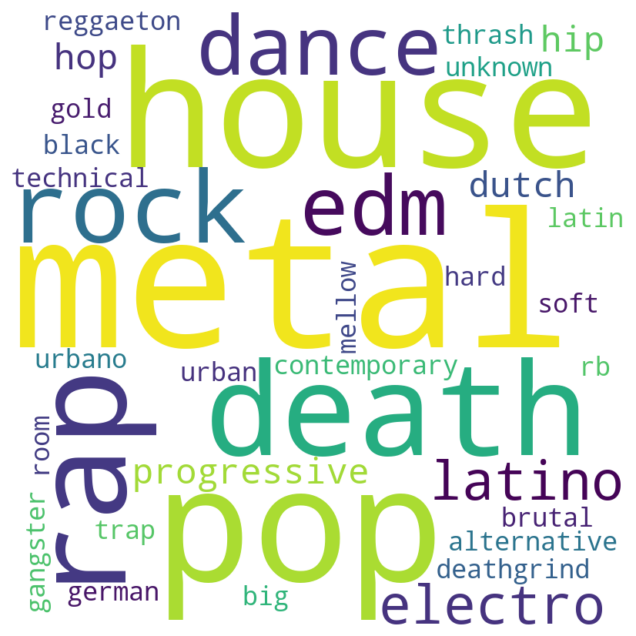

In [38]:
# common genre in cluster 2

cluster_text = ' '.join(cl_2['genre'])

# Text preprocessing
cluster_text = cluster_text.lower()  # Convert to lowercase
cluster_text = cluster_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

nltk.download('stopwords')
# Remove stopwords
stop_words = set(stopwords.words('english'))
cluster_text = ' '.join([word for word in cluster_text.split() if word not in stop_words])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cluster_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Anku
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


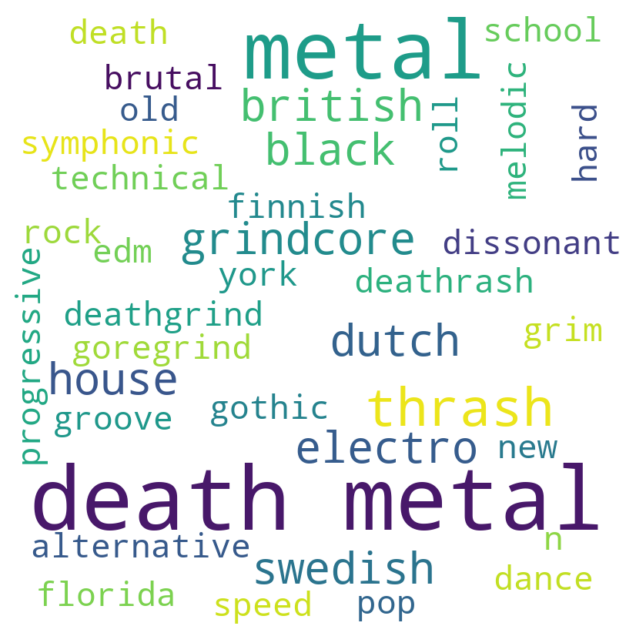

In [39]:
# common genre in cluster 3

cluster_text = ' '.join(cl_3['genre'])

# Text preprocessing
cluster_text = cluster_text.lower()  # Convert to lowercase
cluster_text = cluster_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

nltk.download('stopwords')
# Remove stopwords
stop_words = set(stopwords.words('english'))
cluster_text = ' '.join([word for word in cluster_text.split() if word not in stop_words])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cluster_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Anku
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


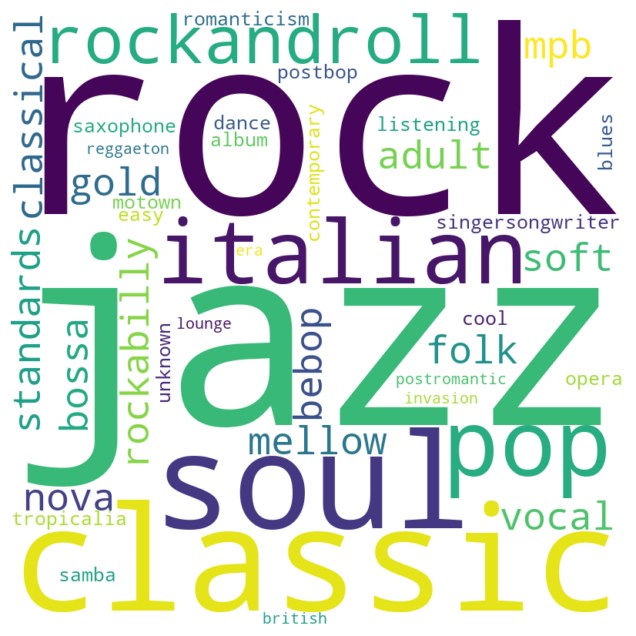

In [40]:
# common genre in cluster 4

cluster_text = ' '.join(cl_4['genre'])

# Text preprocessing
cluster_text = cluster_text.lower()  # Convert to lowercase
cluster_text = cluster_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

nltk.download('stopwords')
# Remove stopwords
stop_words = set(stopwords.words('english'))
cluster_text = ' '.join([word for word in cluster_text.split() if word not in stop_words])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cluster_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Anku
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


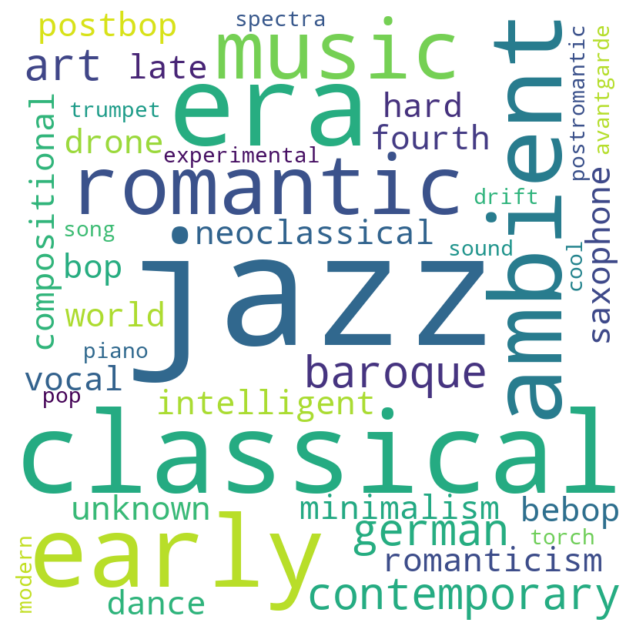

In [41]:
# common genre in cluster 5

cluster_text = ' '.join(cl_5['genre'])

# Text preprocessing
cluster_text = cluster_text.lower()  # Convert to lowercase
cluster_text = cluster_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

nltk.download('stopwords')
# Remove stopwords
stop_words = set(stopwords.words('english'))
cluster_text = ' '.join([word for word in cluster_text.split() if word not in stop_words])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cluster_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# common genre in cluster 6

cluster_text = ' '.join(cl_6['genre'])

# Text preprocessing
cluster_text = cluster_text.lower()  # Convert to lowercase
cluster_text = cluster_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

nltk.download('stopwords')
# Remove stopwords
stop_words = set(stopwords.words('english'))
cluster_text = ' '.join([word for word in cluster_text.split() if word not in stop_words])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cluster_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Anku
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# common genre in cluster 7

cluster_text = ' '.join(cl_7['genre'])

# Text preprocessing
cluster_text = cluster_text.lower()  # Convert to lowercase
cluster_text = cluster_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

nltk.download('stopwords')
# Remove stopwords
stop_words = set(stopwords.words('english'))
cluster_text = ' '.join([word for word in cluster_text.split() if word not in stop_words])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cluster_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Anku
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# use the songs from each cluster to a new playlist in my spotify account

scope = 'playlist-modify-public'
redirectUri = 'http://localhost:3000/callback'

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     )
spotifyObject = spotipy.Spotify(auth_manager=token)

playlist_collection = {}
batch_size = 20  # Adjust batch size as needed

for i in range(6):
    playlist_name = f'cluster_playlist_{i}'
    playlist_description = f'this is a test playlist developed from my KMeans Cluster {i}'
    playlist_id = spotifyObject.user_playlist_create(user=username,
                                                     name=playlist_name,
                                                     public=True,
                                                     description=playlist_description)['id']
    id_list = list(music.loc[music["music_cluster"] == i].sample(100).id)
    uris = [f'spotify:track:{str(id).strip()}' for id in id_list]
    
    for j in range(0, len(uris), batch_size):
        batch = uris[j:j + batch_size]
        spotifyObject.user_playlist_add_tracks(user=username, playlist_id=playlist_id, tracks=batch)
        print(f'Added batch {j // batch_size + 1} to {playlist_name}')
    
    playlist_collection[playlist_name] = playlist_id
